<h1>U.F.O. Sightings Visualization<h1>

<h3><i>1. Install packages/dependencies and import the dataset<i><h3>

In [1]:
# Import all the necessary libraries 

In [2]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Create a dataframe (df) from the .csv file

In [4]:
df = pd.read_csv('C:/Users/kylec/OneDrive/Documents/projects/ufo_sighting_data.csv')

In [5]:
# View the dataframe

In [6]:
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


<h3><i>2. Clean the data<i><h3>

In [7]:
# Drop unnecessary columns

In [8]:
df = df.drop(['Date_time', 'length_of_encounter_seconds', 'described_duration_of_encounter', 'description', 'date_documented'], axis=1)

In [9]:
# View updated dataframe

In [10]:
df.head(60)

,city,state/province,country,UFO_shape,latitude,longitude
0,san marcos,tx,us,cylinder,29.8830556,-97.941111
1,lackland afb,tx,NaN,light,29.38421,-98.581082
2,chester (uk/england),NaN,gb,circle,53.2,-2.916667
3,edna,tx,us,circle,28.9783333,-96.645833
4,kaneohe,hi,us,light,21.4180556,-157.803611
5,bristol,tn,us,sphere,36.595,-82.188889
6,penarth (uk/wales),NaN,gb,circle,51.434722,-3.180000
7,norwalk,ct,us,disk,41.1175,-73.408333
8,pell city,al,us,disk,33.5861111,-86.286111
9,live oak,fl,us,disk,30.2947222,-82.984167


In [11]:
# Remove non-numeric values in latitude and longitude columns

In [12]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

<h3><i>3. Render the data visually<i><h3>

In [13]:
# Create a Point geometry column

In [14]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [15]:
# Create a GeoDataFrame

In [16]:
gdf = GeoDataFrame(df, geometry=geometry)

In [17]:
# Load the world shapefile using geopandas

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [19]:
# Plot the sightings on the world map

<AxesSubplot:>

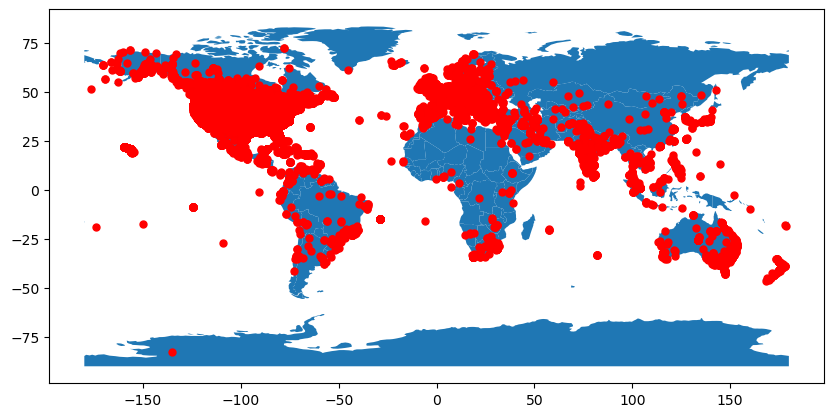

In [20]:
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=25)

In [21]:
# Get the count of each unique value in the 'UFO_shape' column to condense the shape categories based on the report

In [22]:
shape_counts = gdf['UFO_shape'].value_counts()
print(shape_counts)

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: UFO_shape, dtype: int64


In [23]:
# Combine the shape categories that have < 10 reported into the 'other' shape category

In [24]:
print(gdf['UFO_shape'])
shapes_to_combine = shape_counts[shape_counts < 10].index.tolist()
gdf['UFO_shape'] = gdf['UFO_shape'].replace(shapes_to_combine, 'other')
print(gdf['UFO_shape'])

0        cylinder
1           light
2          circle
3          circle
4           light
           ...   
80327       light
80328      circle
80329       other
80330      circle
80331       cigar
Name: UFO_shape, Length: 80332, dtype: object
0        cylinder
1           light
2          circle
3          circle
4           light
           ...   
80327       light
80328      circle
80329       other
80330      circle
80331       cigar
Name: UFO_shape, Length: 80332, dtype: object


In [25]:
# Define a dictionary to map shape values to condensed shapes

In [26]:
shape_mapping = {'Light': ['light', 'flash'], 'Circular': ['circle', 'sphere', 'disk', 'oval', 'egg'], 'Triangular': ['triangle', 'chevron'], 'Other': ['other', 'unknown', 'formation', 'changing', 'cylinder', 'teardrop', 'cone', 'cross'], 'Fireball': 'fireball', 'Cigar': 'cigar', 'Rectangular': 'rectangle', 'Diamond': 'diamond'}

In [27]:
# Create a new column to hold the condensed shape values 

In [28]:
gdf['condensed_shape'] = gdf['UFO_shape']

In [29]:
# Replace shape values with condensed shapes 

In [30]:
for condensed_shape, shape_list in shape_mapping.items():
    gdf['condensed_shape'] = gdf['condensed_shape'].replace(shape_list, condensed_shape)

In [31]:
# Format and plot the sightings on the world map with a scatter plot

<GeoAxesSubplot:title={'center':'REPORTED UFO SIGHTINGS'}>

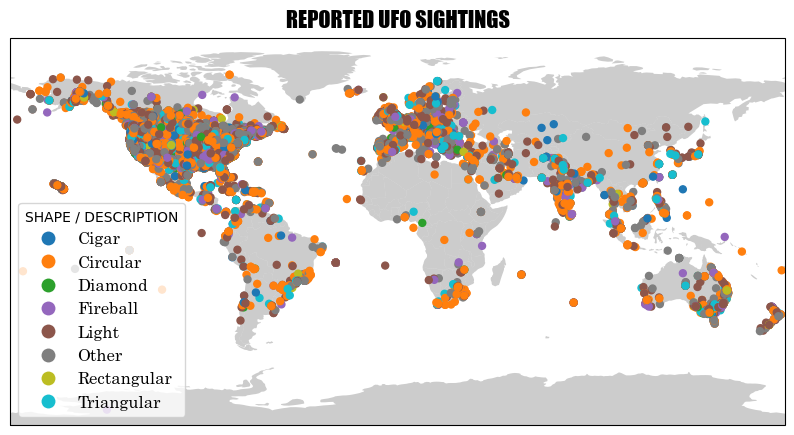

In [32]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title('REPORTED UFO SIGHTINGS')
ax.title.set_text('REPORTED UFO SIGHTINGS')
ax.title.set_position([.5, 1.05])
ax.title.set_fontsize(16)
ax.title.set_fontweight('bold')
ax.title.set_color('black')
ax.title.set_fontname('Impact')
ax.title.set_ha('center')
ax.title.set_va('bottom')
ax.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8, boxstyle='round'))
world.plot(ax=ax, alpha=0.4, color='gray')
gdf.plot(ax=ax, column='condensed_shape', markersize=25, legend=True, categorical=True, legend_kwds={'title': 'SHAPE / DESCRIPTION',  'prop': {'size': 12, 'family': 'Century'}})

In [33]:
# Define colors for each condensed_shape category

In [34]:
colors = {'Light': 'yellow', 'Circular': 'red', 'Triangular': 'blue', 'Other': 'green', 
          'Fireball': 'orange', 'Cigar': 'purple', 'Rectangular': 'brown', 'Diamond': 'gray'}

In [35]:
# Group the data and count the number of occurrences

In [36]:
counts = gdf.groupby('condensed_shape')['condensed_shape'].count()

In [37]:
# Format and plot the findings with a pie chart and a histogram

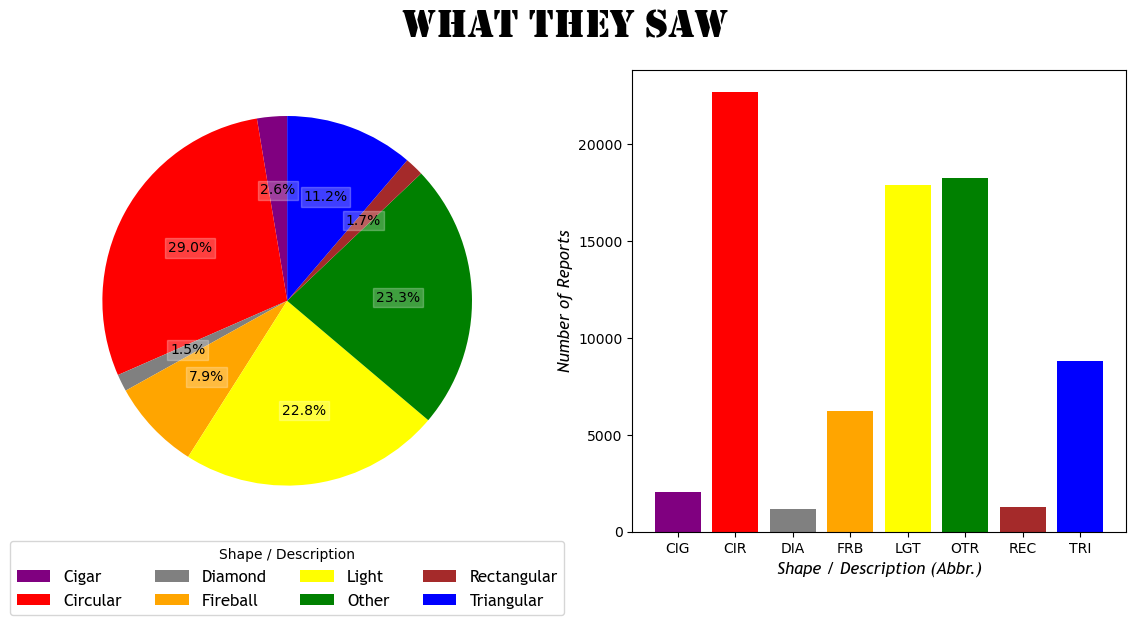

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

wedges, texts, autotexts = ax1.pie(counts.values, colors=[colors.get(x, '#333333') for x in counts.index], autopct='%1.1f%%', startangle=90)
ax1.legend(wedges, counts.index, title='Shape / Description', loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4,  prop={'family': 'Trebuchet MS', 'size': 12})

for autotext in autotexts:
    autotext.set_bbox({'edgecolor': 'white', 'facecolor': 'white', 'alpha': 0.25, 'pad': 2})

ax2.bar(counts.index, counts.values, color=[colors.get(x, '#333333') for x in counts.index])
ax2.set_xlabel('Shape / Description (Abbr.)', fontname='Trebuchet MS', fontsize=12, fontstyle='italic')
ax2.set_ylabel('Number of Reports', fontname='Trebuchet MS', fontsize=12, fontstyle='italic')
abbrev_labels = ['CIG', 'CIR', 'DIA', 'FRB', 'LGT', 'OTR', 'REC', 'TRI']
ax2.set_xticklabels(abbrev_labels)

fig.suptitle('WHAT THEY SAW', fontsize=30, fontname='Stencil', ha='center')

plt.show()

<h3><i>4. Draw your conclusions<i><h3>

<h5>What we see is a matter of perception in every individual case. The findings from the dataset convey to me the idea that people have seen unexplainable objects of various description in the skies. Many have had similar experiences and others were very different. Nevertheless, the myriad of sighting reports brings me to the conclusion that the truth is indeed out there.<h5>